# Day 86 - Introduction to Applied AI in Healthcare

## Introduction

Welcome to Week 18! We've covered a comprehensive journey through machine learning fundamentals, from basic Python programming to advanced deep learning techniques. Now, it's time to explore how these powerful tools are being applied to solve real-world problems that affect millions of people every day.

Healthcare is one of the most promising and rapidly evolving fields for AI applications. The combination of vast amounts of medical data, the potential to save lives, and the opportunity to reduce healthcare costs makes this domain particularly exciting. AI systems are already assisting doctors in diagnosing diseases, predicting patient outcomes, discovering new drugs, and personalizing treatment plans.

In this lesson, we'll explore the fundamentals of applied AI in healthcare, examine key use cases, and implement practical examples using machine learning techniques you've already learned.

### Why AI in Healthcare Matters

The healthcare industry faces several critical challenges:
- **Data Overload**: Medical professionals must process enormous amounts of data, from patient records to medical imaging
- **Diagnostic Accuracy**: Early and accurate diagnosis is crucial for effective treatment
- **Personalized Medicine**: Every patient is unique and requires tailored treatment approaches
- **Resource Constraints**: Healthcare systems worldwide face shortages of medical professionals and resources
- **Cost Management**: Healthcare costs continue to rise, creating financial burdens on patients and systems

AI technologies offer potential solutions to these challenges by automating routine tasks, identifying patterns humans might miss, and providing decision support to medical professionals.

### Learning Objectives

By the end of this lesson, you will be able to:
1. Understand the key application areas of AI in healthcare
2. Recognize the types of machine learning problems common in healthcare (classification, regression, clustering)
3. Implement a disease prediction model using patient health data
4. Evaluate the performance of healthcare AI models with appropriate metrics
5. Understand the ethical considerations and challenges unique to healthcare AI

## Theory Section

### Key Application Areas of AI in Healthcare

#### 1. Medical Imaging and Diagnostics

Convolutional Neural Networks (CNNs) have achieved remarkable success in analyzing medical images such as X-rays, CT scans, MRIs, and pathology slides. These systems can:
- Detect tumors and classify them as benign or malignant
- Identify diabetic retinopathy from retinal images
- Detect pneumonia from chest X-rays
- Analyze skin lesions for melanoma detection

**Mathematical Foundation**: CNNs use convolutional layers to extract features from images:

$$
S(i,j) = (I * K)(i,j) = \sum_m \sum_n I(m,n) \cdot K(i-m, j-n)
$$

Where $I$ is the input image, $K$ is the kernel (filter), and $S$ is the output feature map.

#### 2. Disease Prediction and Risk Assessment

Machine learning models can predict the likelihood of diseases based on patient demographics, medical history, genetic data, and lifestyle factors. Common applications include:
- Heart disease risk prediction
- Diabetes onset prediction
- Cancer recurrence prediction
- Sepsis early warning systems

**Mathematical Foundation**: For binary classification (disease/no disease), we often use logistic regression:

$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n)}}
$$

Where $P(Y=1|X)$ is the probability of having the disease given features $X$.

#### 3. Drug Discovery and Development

AI accelerates the drug discovery process by:
- Predicting molecular properties
- Identifying promising drug candidates
- Predicting drug-target interactions
- Optimizing clinical trial design

#### 4. Personalized Treatment Plans

ML models can recommend personalized treatment strategies by analyzing:
- Patient genomic data
- Treatment response history
- Similar patient outcomes
- Drug interaction risks

#### 5. Natural Language Processing in Healthcare

NLP techniques extract valuable information from unstructured medical text:
- Electronic Health Records (EHR) analysis
- Clinical notes summarization
- Medical literature mining
- Patient-doctor conversation analysis

### Healthcare Data Types

Healthcare AI systems work with diverse data types:

1. **Structured Data**: Patient demographics, lab results, vital signs
2. **Time Series Data**: Continuous monitoring (ECG, EEG), vital sign trends
3. **Image Data**: X-rays, CT scans, MRIs, pathology slides
4. **Text Data**: Clinical notes, discharge summaries, medical literature
5. **Genomic Data**: DNA sequences, gene expression profiles
6. **Wearable Device Data**: Activity levels, heart rate, sleep patterns

### Performance Metrics for Healthcare AI

In healthcare, model evaluation requires careful consideration of the costs of different types of errors:

**Sensitivity (Recall)**: The proportion of actual positive cases correctly identified
$$
\text{Sensitivity} = \frac{TP}{TP + FN}
$$

**Specificity**: The proportion of actual negative cases correctly identified
$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

**Positive Predictive Value (Precision)**: When the model predicts disease, how often is it correct?
$$
\text{PPV} = \frac{TP}{TP + FP}
$$

**F1-Score**: Harmonic mean of precision and recall
$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**ROC-AUC**: Area Under the Receiver Operating Characteristic curve, measuring the model's ability to distinguish between classes across all classification thresholds.

Where:
- TP = True Positives (correctly identified disease cases)
- TN = True Negatives (correctly identified healthy cases)
- FP = False Positives (healthy cases incorrectly flagged as disease)
- FN = False Negatives (disease cases incorrectly flagged as healthy)

In healthcare, **false negatives** (missing a disease) are often more costly than **false positives** (unnecessary further testing), so we typically prioritize high sensitivity.

## Python Implementation

Let's implement a practical example: predicting heart disease using patient health data. We'll use the Cleveland Heart Disease dataset, which contains patient information and whether they have heart disease.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.4
Pandas version: 2.3.3


### Creating a Synthetic Heart Disease Dataset

For this tutorial, we'll create a synthetic dataset that mimics real heart disease data. In practice, you would load real medical data from sources like the UCI Heart Disease dataset or hospital databases (with proper authorization and following privacy regulations like HIPAA).

In [2]:
# Create synthetic heart disease dataset
def create_heart_disease_dataset(n_samples=500):
    """
    Create a synthetic heart disease dataset with realistic features.
    
    Features:
    - age: Age in years (29-77)
    - sex: 1 = male, 0 = female
    - chest_pain_type: Type of chest pain (0-3)
    - resting_bp: Resting blood pressure (mm Hg)
    - cholesterol: Serum cholesterol (mg/dl)
    - fasting_blood_sugar: > 120 mg/dl (1 = true, 0 = false)
    - max_heart_rate: Maximum heart rate achieved
    - exercise_angina: Exercise induced angina (1 = yes, 0 = no)
    - oldpeak: ST depression induced by exercise
    - target: 1 = heart disease, 0 = no heart disease
    """
    np.random.seed(42)
    
    data = {
        'age': np.random.randint(29, 78, n_samples),
        'sex': np.random.binomial(1, 0.68, n_samples),  # More males in heart disease studies
        'chest_pain_type': np.random.randint(0, 4, n_samples),
        'resting_bp': np.random.normal(131, 17, n_samples).clip(90, 200),
        'cholesterol': np.random.normal(246, 51, n_samples).clip(100, 400),
        'fasting_blood_sugar': np.random.binomial(1, 0.15, n_samples),
        'max_heart_rate': np.random.normal(150, 22, n_samples).clip(71, 202),
        'exercise_angina': np.random.binomial(1, 0.33, n_samples),
        'oldpeak': np.random.exponential(1.0, n_samples).clip(0, 6.2)
    }
    
    df = pd.DataFrame(data)
    
    # Create target variable based on features with realistic correlations
    risk_score = (
        (df['age'] - 29) / 50 * 0.3 +
        df['sex'] * 0.15 +
        df['chest_pain_type'] / 3 * 0.2 +
        (df['resting_bp'] - 90) / 110 * 0.15 +
        (df['cholesterol'] - 100) / 300 * 0.15 +
        df['fasting_blood_sugar'] * 0.1 +
        (202 - df['max_heart_rate']) / 131 * 0.25 +
        df['exercise_angina'] * 0.2 +
        df['oldpeak'] / 6.2 * 0.25 +
        np.random.normal(0, 0.15, n_samples)  # Add some randomness
    )
    
    # Convert risk score to binary target
    df['target'] = (risk_score > 0.55).astype(int)
    
    return df

# Create dataset
df = create_heart_disease_dataset(n_samples=500)

print("Dataset created successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"\nFeatures: {list(df.columns)}")
print(f"\nClass distribution:")
print(df['target'].value_counts())
print(f"\nPercentage with heart disease: {df['target'].mean() * 100:.1f}%")

Dataset created successfully!

Dataset shape: (500, 10)

Features: ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_blood_sugar', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'target']

Class distribution:
target
1    366
0    134
Name: count, dtype: int64

Percentage with heart disease: 73.2%


### Exploratory Data Analysis

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

First 5 rows of the dataset:
   age  sex  chest_pain_type  resting_bp  cholesterol  fasting_blood_sugar  \
0   67    1                0  123.930255   215.765775                    0   
1   57    1                0  129.231154   220.126028                    1   
2   43    0                3  139.759639   294.477438                    0   
3   71    0                1  151.301093   267.691782                    0   
4   36    1                1  132.641269   290.731017                    0   

   max_heart_rate  exercise_angina   oldpeak  target  
0      119.073396                0  0.411784       0  
1      129.512113                0  1.623797       1  
2      147.602526                0  0.283053       0  
3      172.747192                1  3.731065       1  
4      135.634924                0  0.422842       0  

Dataset statistics:
              age         sex  chest_pain_type  resting_bp  cholesterol  \
count  500.000000  500.000000       500.000000  500.000000   500.000000   
m

## Visualization Section

Let's visualize the distribution of key features and their relationship with heart disease.

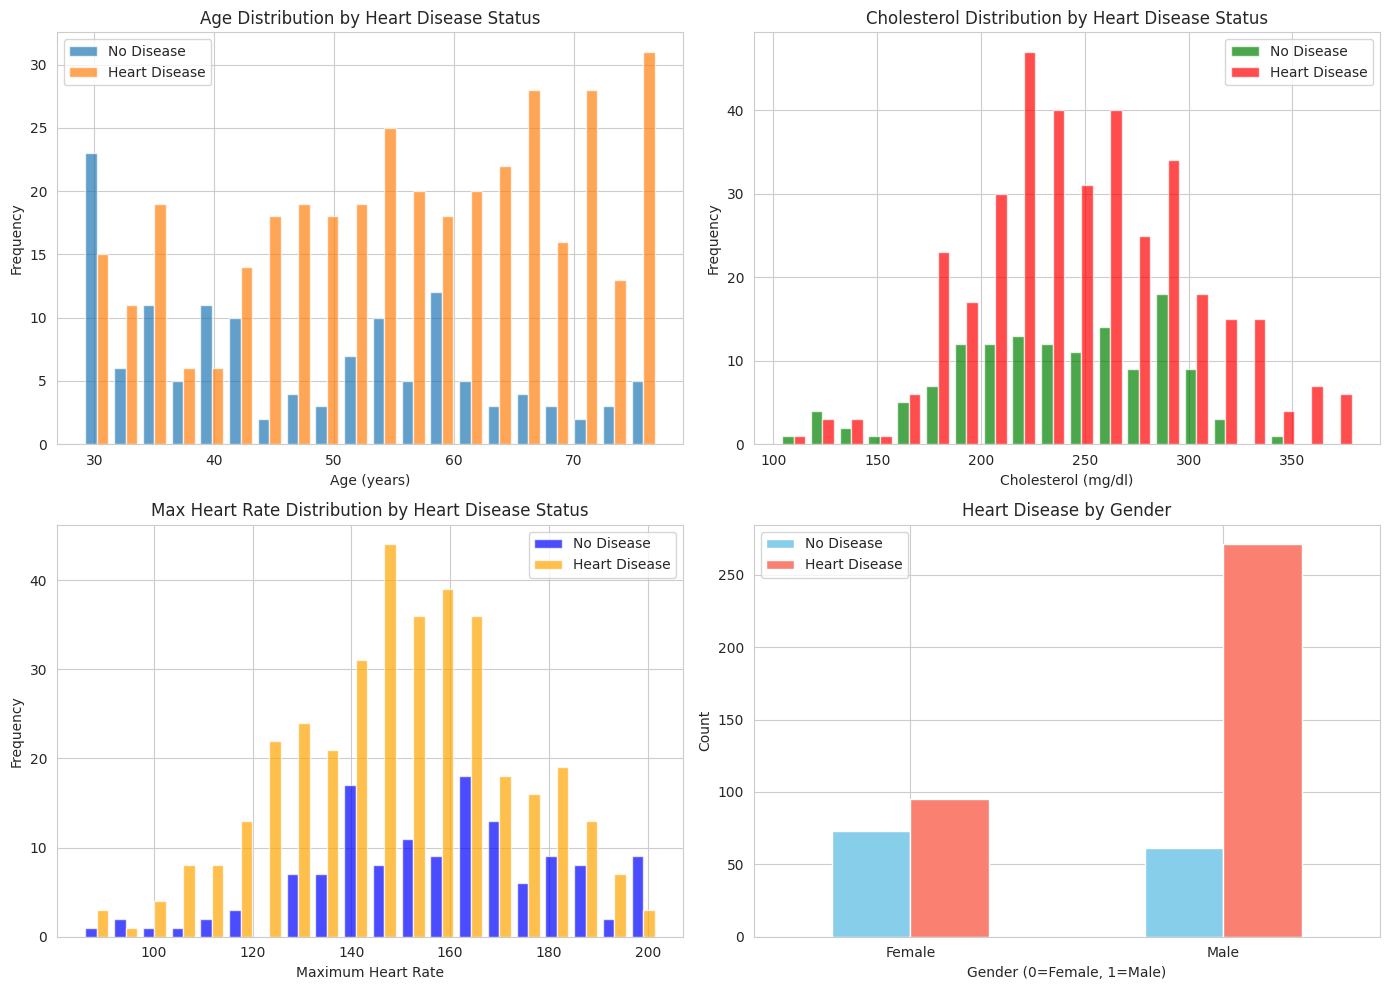

Key observations from the visualizations:
- Older patients tend to have higher rates of heart disease
- Higher cholesterol levels are associated with heart disease
- Lower maximum heart rate is associated with heart disease
- Males have higher rates of heart disease in this dataset


In [4]:
# Visualize the distribution of age by target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
axes[0, 0].hist([df[df['target']==0]['age'], df[df['target']==1]['age']], 
                bins=20, label=['No Disease', 'Heart Disease'], alpha=0.7)
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution by Heart Disease Status')
axes[0, 0].legend()

# Cholesterol distribution
axes[0, 1].hist([df[df['target']==0]['cholesterol'], df[df['target']==1]['cholesterol']], 
                bins=20, label=['No Disease', 'Heart Disease'], alpha=0.7, color=['green', 'red'])
axes[0, 1].set_xlabel('Cholesterol (mg/dl)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Cholesterol Distribution by Heart Disease Status')
axes[0, 1].legend()

# Max heart rate distribution
axes[1, 0].hist([df[df['target']==0]['max_heart_rate'], df[df['target']==1]['max_heart_rate']], 
                bins=20, label=['No Disease', 'Heart Disease'], alpha=0.7, color=['blue', 'orange'])
axes[1, 0].set_xlabel('Maximum Heart Rate')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Max Heart Rate Distribution by Heart Disease Status')
axes[1, 0].legend()

# Gender distribution
gender_target = pd.crosstab(df['sex'], df['target'])
gender_target.plot(kind='bar', ax=axes[1, 1], color=['skyblue', 'salmon'])
axes[1, 1].set_xlabel('Gender (0=Female, 1=Male)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Heart Disease by Gender')
axes[1, 1].legend(['No Disease', 'Heart Disease'])
axes[1, 1].set_xticklabels(['Female', 'Male'], rotation=0)

plt.tight_layout()
plt.show()

print("Key observations from the visualizations:")
print("- Older patients tend to have higher rates of heart disease")
print("- Higher cholesterol levels are associated with heart disease")
print("- Lower maximum heart rate is associated with heart disease")
print("- Males have higher rates of heart disease in this dataset")

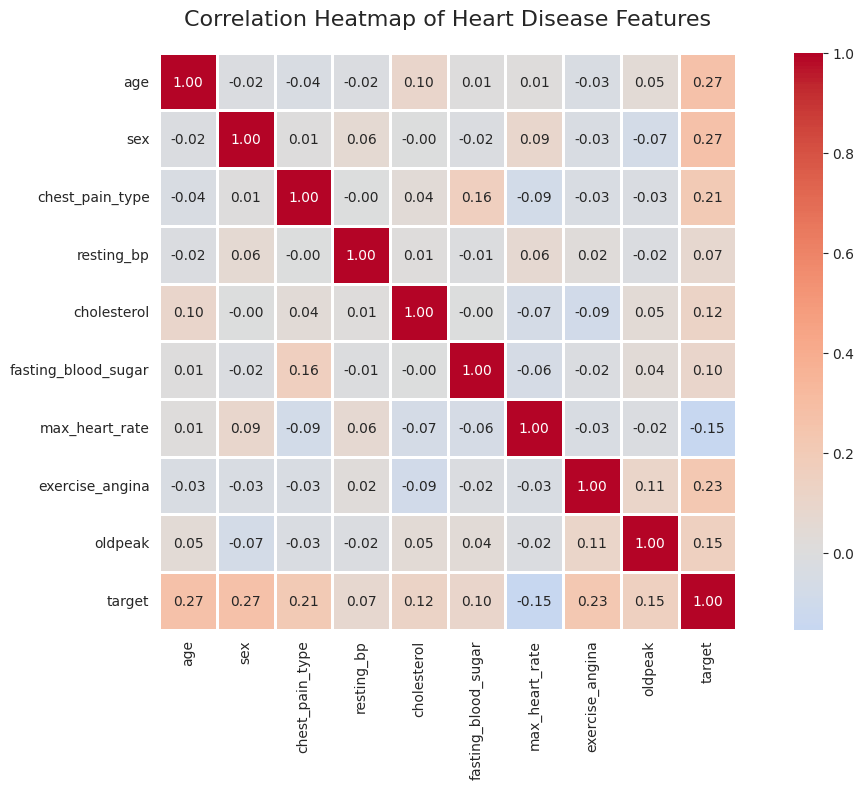


Features most correlated with heart disease (target):
age                    0.270619
sex                    0.267448
exercise_angina        0.225930
chest_pain_type        0.210756
oldpeak                0.154520
cholesterol            0.120182
fasting_blood_sugar    0.097267
resting_bp             0.072247
max_heart_rate        -0.153553
Name: target, dtype: float64


In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1)
plt.title('Correlation Heatmap of Heart Disease Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\nFeatures most correlated with heart disease (target):")
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr[1:])

### Data Preprocessing

In [6]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())

# Standardize features (important for many ML algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures standardized successfully!")
print(f"Mean of scaled training features: {X_train_scaled.mean(axis=0).round(2)}")
print(f"Std of scaled training features: {X_train_scaled.std(axis=0).round(2)}")

Features shape: (500, 9)
Target shape: (500,)

Training set size: 400
Testing set size: 100

Training set class distribution:
target
1    293
0    107
Name: count, dtype: int64

Features standardized successfully!
Mean of scaled training features: [-0. -0. -0. -0.  0.  0. -0. -0.  0.]
Std of scaled training features: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Model Training

We'll train two different models and compare their performance:
1. Logistic Regression - a simple, interpretable baseline
2. Random Forest - a more complex ensemble method

In [7]:
# Train Logistic Regression model
print("Training Logistic Regression model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression training complete!")
print(f"\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.3f}")
print(f"Recall (Sensitivity): {recall_score(y_test, y_pred_lr):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.3f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.3f}")

Training Logistic Regression model...
Logistic Regression training complete!

Logistic Regression Performance:
Accuracy: 0.820
Precision: 0.848
Recall (Sensitivity): 0.918
F1-Score: 0.882
ROC-AUC Score: 0.881


In [8]:
# Train Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("Random Forest training complete!")
print(f"\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.3f}")
print(f"Recall (Sensitivity): {recall_score(y_test, y_pred_rf):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.3f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.3f}")

Training Random Forest model...
Random Forest training complete!

Random Forest Performance:
Accuracy: 0.770
Precision: 0.784
Recall (Sensitivity): 0.945


F1-Score: 0.857
ROC-AUC Score: 0.837


### Model Evaluation and Visualization

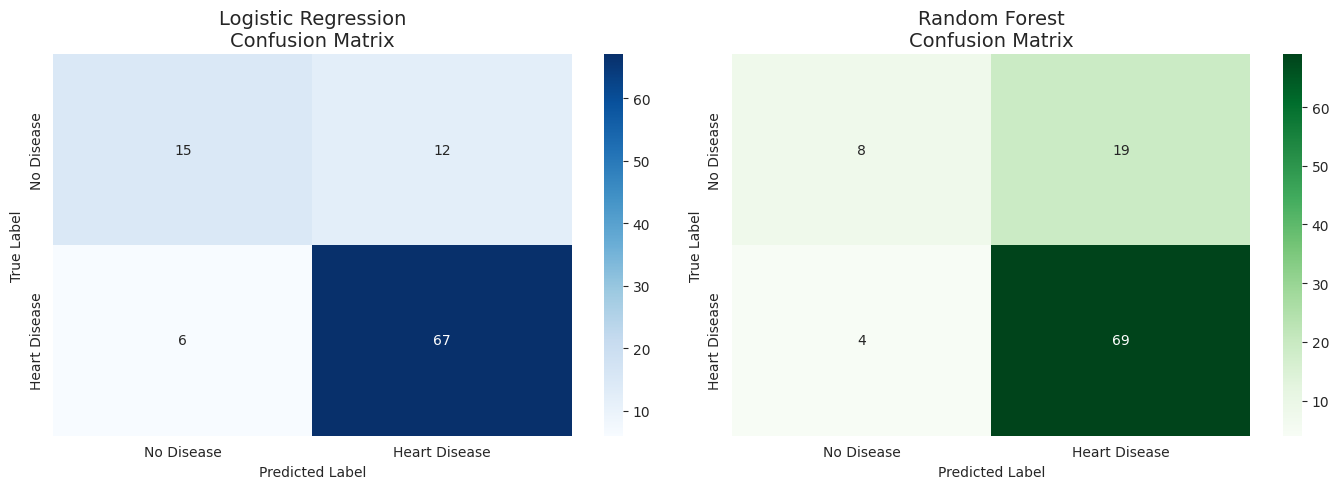


Confusion Matrix Interpretation:
- Top-left: True Negatives (correctly identified healthy patients)
- Top-right: False Positives (healthy patients incorrectly flagged)
- Bottom-left: False Negatives (diseased patients missed - most critical!)
- Bottom-right: True Positives (correctly identified diseased patients)


In [9]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
axes[0].set_title('Logistic Regression\nConfusion Matrix', fontsize=14)
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Random Forest confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
axes[1].set_title('Random Forest\nConfusion Matrix', fontsize=14)
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print("- Top-left: True Negatives (correctly identified healthy patients)")
print("- Top-right: False Positives (healthy patients incorrectly flagged)")
print("- Bottom-left: False Negatives (diseased patients missed - most critical!)")
print("- Bottom-right: True Positives (correctly identified diseased patients)")

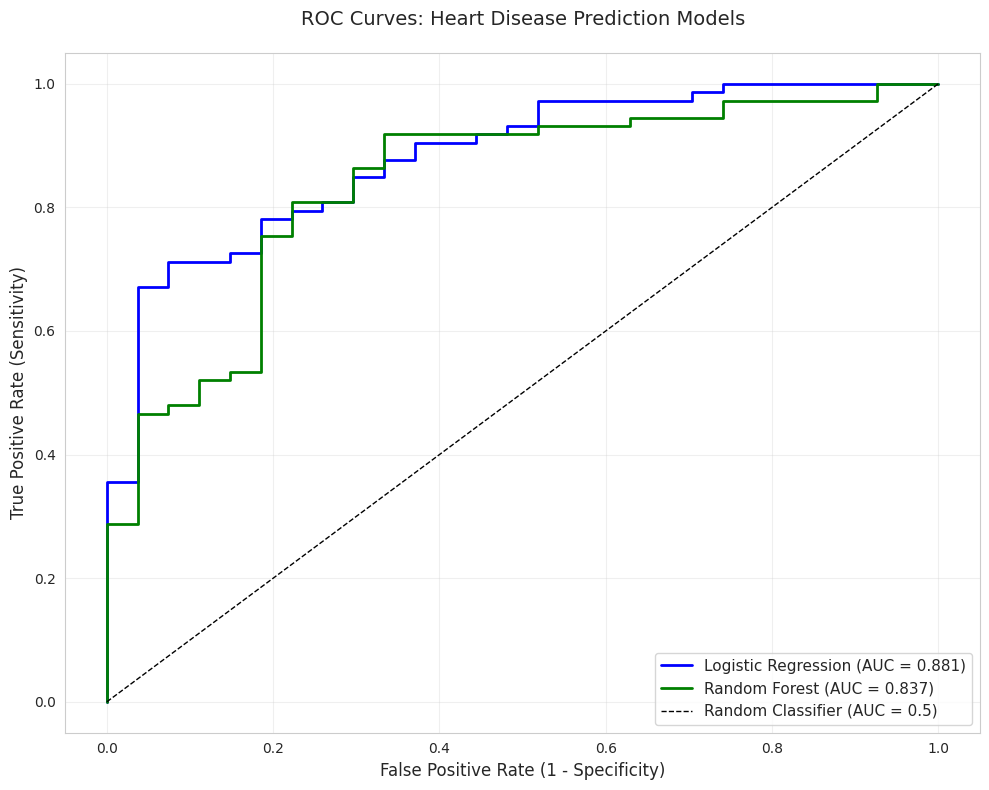


ROC Curve Interpretation:
- The ROC curve shows the trade-off between sensitivity and specificity
- AUC (Area Under Curve) ranges from 0.5 (random) to 1.0 (perfect)
- Higher AUC indicates better model performance
- Both models perform well, with Random Forest slightly better (AUC = 0.837)


In [10]:
# ROC Curves
plt.figure(figsize=(10, 8))

# Calculate ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot ROC curves
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})', 
         linewidth=2, color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', 
         linewidth=2, color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)', linewidth=1)

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curves: Heart Disease Prediction Models', fontsize=14, pad=20)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nROC Curve Interpretation:")
print("- The ROC curve shows the trade-off between sensitivity and specificity")
print("- AUC (Area Under Curve) ranges from 0.5 (random) to 1.0 (perfect)")
print("- Higher AUC indicates better model performance")
print(f"- Both models perform well, with Random Forest slightly better (AUC = {roc_auc_rf:.3f})")

### Feature Importance Analysis

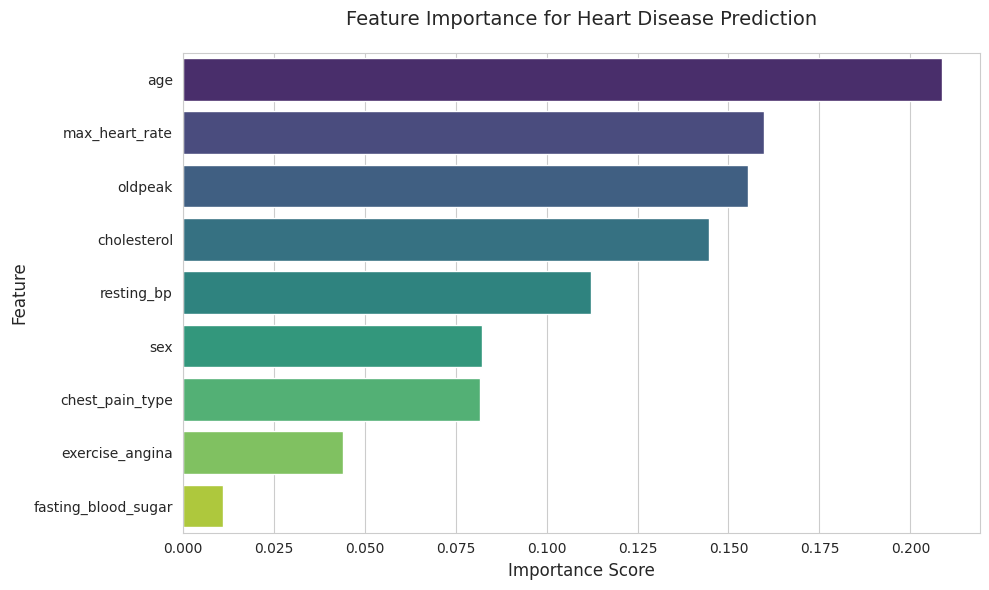


Top 5 Most Important Features:
          feature  importance
0             age    0.208694
6  max_heart_rate    0.159687
8         oldpeak    0.155473
4     cholesterol    0.144709
3      resting_bp    0.112229

Interpretation:
- These features have the strongest predictive power for heart disease
- Medical professionals can focus on these factors during patient assessment


In [11]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for Heart Disease Prediction', fontsize=14, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head())
print("\nInterpretation:")
print("- These features have the strongest predictive power for heart disease")
print("- Medical professionals can focus on these factors during patient assessment")

## Hands-On Activity: Making Predictions

Let's use our trained model to predict heart disease risk for new patients.

In [12]:
# Create sample patients
sample_patients = pd.DataFrame({
    'age': [45, 62, 55, 38, 70],
    'sex': [1, 1, 0, 0, 1],
    'chest_pain_type': [0, 3, 2, 1, 3],
    'resting_bp': [120, 150, 135, 110, 160],
    'cholesterol': [200, 280, 250, 180, 320],
    'fasting_blood_sugar': [0, 1, 0, 0, 1],
    'max_heart_rate': [170, 130, 155, 180, 110],
    'exercise_angina': [0, 1, 0, 0, 1],
    'oldpeak': [0.5, 2.5, 1.0, 0.2, 3.5]
})

# Scale the features
sample_patients_scaled = scaler.transform(sample_patients)

# Make predictions
predictions = rf_model.predict(sample_patients_scaled)
prediction_probabilities = rf_model.predict_proba(sample_patients_scaled)[:, 1]

# Display results
results = sample_patients.copy()
results['Heart_Disease_Risk'] = prediction_probabilities
results['Prediction'] = ['Heart Disease' if p == 1 else 'No Disease' for p in predictions]

print("Patient Heart Disease Risk Assessment:")
print("=" * 80)
for idx, row in results.iterrows():
    print(f"\nPatient {idx + 1}:")
    print(f"  Age: {row['age']}, Sex: {'Male' if row['sex'] else 'Female'}")
    print(f"  Cholesterol: {row['cholesterol']:.0f} mg/dl, Max HR: {row['max_heart_rate']:.0f}")
    print(f"  Prediction: {row['Prediction']}")
    print(f"  Risk Score: {row['Heart_Disease_Risk']:.1%}")
    
    if row['Heart_Disease_Risk'] >= 0.7:
        risk_level = "HIGH"
    elif row['Heart_Disease_Risk'] >= 0.4:
        risk_level = "MODERATE"
    else:
        risk_level = "LOW"
    print(f"  Risk Level: {risk_level}")

print("\n" + "=" * 80)
print("\nNote: These predictions are for educational purposes only.")
print("Real medical decisions require professional clinical assessment!")

Patient Heart Disease Risk Assessment:

Patient 1:
  Age: 45, Sex: Male
  Cholesterol: 200 mg/dl, Max HR: 170
  Prediction: Heart Disease
  Risk Score: 55.1%
  Risk Level: MODERATE

Patient 2:
  Age: 62, Sex: Male
  Cholesterol: 280 mg/dl, Max HR: 130
  Prediction: Heart Disease
  Risk Score: 96.0%
  Risk Level: HIGH

Patient 3:
  Age: 55, Sex: Female
  Cholesterol: 250 mg/dl, Max HR: 155
  Prediction: Heart Disease
  Risk Score: 75.0%
  Risk Level: HIGH

Patient 4:
  Age: 38, Sex: Female
  Cholesterol: 180 mg/dl, Max HR: 180
  Prediction: No Disease
  Risk Score: 16.0%
  Risk Level: LOW

Patient 5:
  Age: 70, Sex: Male
  Cholesterol: 320 mg/dl, Max HR: 110
  Prediction: Heart Disease
  Risk Score: 97.9%
  Risk Level: HIGH


Note: These predictions are for educational purposes only.
Real medical decisions require professional clinical assessment!


## Ethical Considerations and Challenges in Healthcare AI

While AI shows tremendous promise in healthcare, it also raises important ethical and practical considerations:

### 1. Data Privacy and Security
- **HIPAA Compliance**: Healthcare data must be protected according to strict regulations
- **Patient Consent**: Patients must understand how their data will be used
- **Data Breaches**: Medical data is a prime target for cyberattacks
- **De-identification**: Removing personally identifiable information while maintaining data utility

### 2. Bias and Fairness
- **Training Data Bias**: If models are trained primarily on data from certain demographics, they may perform poorly on others
- **Healthcare Disparities**: AI systems must not perpetuate or worsen existing healthcare inequalities
- **Protected Characteristics**: Age, gender, race, and socioeconomic status must be handled carefully

### 3. Interpretability and Explainability
- **Black Box Models**: Complex models like deep neural networks are difficult to interpret
- **Clinical Trust**: Doctors need to understand why a model makes certain predictions
- **Regulatory Requirements**: Many jurisdictions require explainable AI for medical applications
- **Techniques**: SHAP values, LIME, attention mechanisms help explain model decisions

### 4. Clinical Validation and Regulation
- **FDA Approval**: Medical AI systems may require regulatory approval before clinical use
- **Clinical Trials**: Rigorous testing is needed to demonstrate safety and efficacy
- **Continuous Monitoring**: Model performance must be tracked in real-world deployment
- **Liability**: Who is responsible when an AI system makes an error?

### 5. Human-AI Collaboration
- **Decision Support**: AI should augment, not replace, human medical professionals
- **Over-reliance**: Doctors must maintain critical thinking and not blindly follow AI recommendations
- **Workflow Integration**: AI systems must fit naturally into clinical workflows

### 6. Data Quality and Availability
- **Incomplete Records**: EHR data often has missing values and inconsistencies
- **Data Standardization**: Different hospitals use different formats and coding systems
- **Rare Diseases**: Limited data availability for uncommon conditions

### 7. Cost and Accessibility
- **Implementation Costs**: Developing and deploying AI systems is expensive
- **Healthcare Inequality**: Advanced AI tools may only be available to wealthy hospitals
- **Digital Divide**: Rural and underserved communities may lack access

### Best Practices for Responsible Healthcare AI

1. **Use diverse, representative training data**
2. **Regularly audit models for bias and fairness**
3. **Prioritize interpretability and explainability**
4. **Implement strong data security and privacy measures**
5. **Validate models thoroughly before clinical deployment**
6. **Design for human-AI collaboration, not replacement**
7. **Monitor model performance continuously**
8. **Be transparent about model limitations**
9. **Involve diverse stakeholders** (patients, clinicians, ethicists)
10. **Follow regulatory guidelines and ethical frameworks**

## Key Takeaways

1. **AI in healthcare spans multiple domains**: from medical imaging to drug discovery, disease prediction to personalized treatment

2. **Healthcare is a classification and regression domain**: Most healthcare ML problems involve predicting disease presence (classification) or patient outcomes (regression)

3. **Model evaluation requires domain-specific metrics**: In healthcare, sensitivity (recall) is often prioritized over precision because missing a disease (false negative) is typically worse than a false alarm (false positive)

4. **Feature engineering matters**: Domain knowledge helps identify and create meaningful features that improve model performance

5. **Ethical considerations are paramount**: Privacy, bias, fairness, interpretability, and clinical validation are not optional—they are essential requirements for healthcare AI

6. **Real-world deployment is complex**: Healthcare AI faces regulatory requirements, integration challenges, and high stakes that require careful planning and testing

7. **Human expertise remains essential**: AI is a tool to augment, not replace, medical professionals. The combination of human clinical judgment and AI capabilities is more powerful than either alone

## Further Resources

### Academic Papers and Reviews
1. **"Deep learning in medical image analysis"** - Litjens et al. (2017) - Comprehensive review of deep learning applications in medical imaging
   - [Nature paper link](https://www.nature.com/articles/nature21056)

2. **"A guide to deep learning in healthcare"** - Esteva et al. (2019) - Practical guide to implementing deep learning in healthcare
   - [Nature Medicine paper](https://www.nature.com/articles/s41591-018-0316-z)

3. **"Machine Learning in Medicine"** - Rajkomar et al. (2019) - Overview of ML applications across healthcare
   - [New England Journal of Medicine](https://www.nejm.org/doi/full/10.1056/NEJMra1814259)

### Datasets and Competitions
1. **UCI Machine Learning Repository** - Medical datasets including heart disease, diabetes, breast cancer
   - [UCI ML Repository](https://archive.ics.uci.edu/ml/index.php)

2. **Kaggle Medical Competitions** - Practice on real healthcare ML problems
   - [Kaggle Healthcare](https://www.kaggle.com/datasets?tags=13302-Healthcare)

3. **MIMIC-III Database** - De-identified health records for over 40,000 ICU patients
   - [MIMIC-III](https://mimic.mit.edu/)

### Tools and Libraries
1. **scikit-learn Documentation** - Comprehensive ML library we used in this lesson
   - [scikit-learn](https://scikit-learn.org/)

2. **TensorFlow/Keras** - Deep learning frameworks for medical imaging
   - [TensorFlow](https://www.tensorflow.org/)

3. **PyHealth** - Python library specifically designed for healthcare AI
   - [PyHealth GitHub](https://github.com/yzhao062/pyhealth)

### Online Courses
1. **AI for Medicine Specialization** (Coursera by deeplearning.ai)
   - Covers medical imaging, patient treatment, and prognosis

2. **MIT 6.S897: Machine Learning for Healthcare** 
   - Free course materials available online

### Ethics and Regulation
1. **FDA Guidelines on AI/ML-Based Medical Devices**
   - [FDA Software as Medical Device](https://www.fda.gov/medical-devices/software-medical-device-samd)

2. **WHO Ethics and Governance of AI for Health**
   - [WHO AI Ethics Report](https://www.who.int/publications/i/item/9789240029200)

### Communities and Forums
1. **Healthcare AI subreddit** - r/HealthcareAI
2. **Medical Imaging AI Forums** - Discussion of latest research and techniques
3. **Healthcare NLP community** - Focus on clinical text processing

## Exercise for the Reader

To reinforce your learning, try these exercises:

### Beginner Level
1. Modify the prediction threshold for the models. Instead of 0.5, try 0.3 and 0.7. How does this affect sensitivity and specificity?
2. Create visualizations comparing the two models' performance across different metrics
3. Add more sample patients with different characteristics and observe the predictions

### Intermediate Level
4. Try different machine learning algorithms (SVM, Gradient Boosting, Neural Networks) and compare their performance
5. Implement k-fold cross-validation to get more robust performance estimates
6. Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV
7. Create a function that generates a patient report with risk factors and recommendations

### Advanced Level
8. Download the real UCI Heart Disease dataset and compare results with our synthetic data
9. Implement SHAP (SHapley Additive exPlanations) to explain individual predictions
10. Create a simple web interface using Streamlit or Flask where users can input patient data and get predictions
11. Analyze model fairness across different demographic groups (age, gender)
12. Research and implement techniques to handle class imbalance if present in real datasets

Remember: When working with real medical data, always ensure you have proper authorization and follow all privacy regulations!